In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance  # distance metrics

## אפיון קורסים

הסטודנטים בפקולטה לתעשייה וניהול רצו לעזור לסטודנטים חדשים לבחור קורסי בחירה. לשם כך, הם אספו נתונים מסטודנטים על מידת העניין של הקורס ורמת הקושי של עשרים קורסים. כל פרמטר דורג בסולם בין 1 ל-10. הסטודנטים מעוניינים לחלק את הקורסים לשלוש קבוצות לפי הדירוגים הממוצעים של פרמטרים אלה, כך שקורסים שדומים זה לזה בשני המאפיינים יהיו באותה הקבוצה. 

הגרף הבא מראה את כל הקורסים, כאשר כל נקודה מייצגת קורס, ציר האיקס מייצג את ממוצע רמת הקושי של הקורס וציר הוואי מייצג את ממוצע מידת העניין בקורס

<AxesSubplot:xlabel='difficulty_level', ylabel='interest_level'>

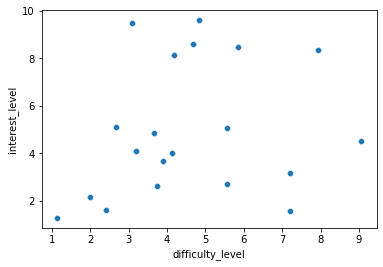

In [2]:
# courses_rankings_df = pd.read_csv('courses_rankings.csv')  # read data
clustering_df = pd.read_csv('clustering_example_scale.csv')

# plot courses by difficulty and interest levels - each point is represents a course
sns.scatterplot(x='difficulty_level', y='interest_level', data=clustering_df)  

הסטודנטים בחרו להשתמש בשיטות קלאסטרינג (אשכול) אשר מחלקות את הנתונים לקבוצות

גל ושקד השתמשו בשתי שיטות שונות וקיבלו חלוקה שונה לקבוצות, כפי שמופיע בגרף מטה.

כמו קודם, כל נקודה מייצגת קורס. הצבעים מייצגים קבוצות שונות של קורסים. למשל, כל הקורסים הכתומים ייחשבו כחלק מקבוצת קורסים אחת

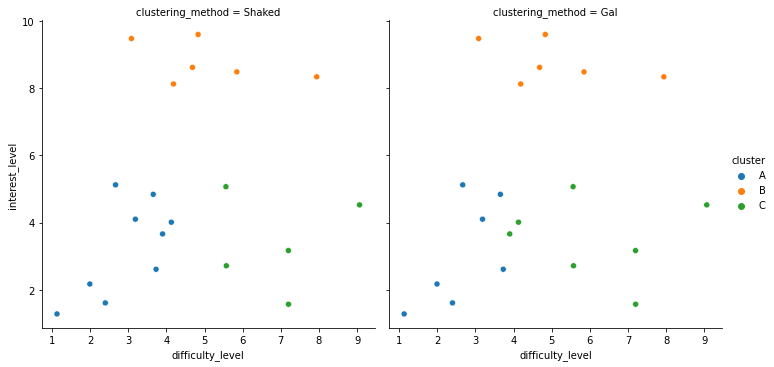

In [3]:
sns.relplot(data=clustering_df, x='difficulty_level', y='interest_level', col='clustering_method', hue='cluster')

### משימה 1

איזו חלוקה לקבוצות עדיפה לדעתכם, של שקד או של גל?

מדוע?

<הכניסו את תשובתכם כאן>

### משימה 2

המציאו מדד (או מדדים) אשר יתנו "ציון" לטיב של חלוקה לקבוצות.

מדד מסוג זה צריך לקבל כקלט את כל הנקודות ושיוכן לקבוצה, ולהחזיר ערך מספרי.

תארו את המדד במילים בתא זה. ציינו מה מטרת המדד (כלומר, מה הופך חלוקה מסוימת לקבוצות לטובה יותר או פחות) וכיצד ברצונכם 
לחשב אותו

<תיאור המדד במילים>

### משימה 3

כעת, כיתבו קוד לחישוב המדד, ובחנו אותו על החלוקה לקבוצות שביצעו גל ושקד. 

לרשותכם שתי פונקציות עזר - אחת המחזירה את כל הנקודות בקבוצה לפי חלוקה מסוימת לקבוצות.

הפונקציה השנייה הינה פונקציה קיימת של פייתון המחזירה מרחק בין שתי נקודות.

In [ ]:
def get_all_points_in_cluster(clusters_df, cluster_name, clustering_method):
    '''
    This function gets as input a dataframe with clusters, the name of the clustering method 
    and the name of a cluster, and returns all points in that cluster as a numpy array
    '''
    # filter dataframe to get only points from the appropriate clustering method and appropriate cluster
    cluster_df = clusters_df[(clusters_df['cluster'] == cluster_name) & (clusters_df['clustering_method'] == clustering_method)]
    # get only the ranking columns
    cluster_points = cluster_df[['difficulty_level','interest_level']]
    # convert columns to numpy array
    cluster_points = cluster_points.values
    return cluster_points

In [ ]:
# example use of 'get_all_points_in_cluster' - 
# get all courses from cluster A according to Gal's clustering
Gal_A_points = get_all_points_in_cluster(clustering_df,'A','Gal')
print(Gal_A_points)

In [ ]:
# you can also use the 'distance.euclidean' function to get the distance between two points
# example - use of euclidean distance:
distance_between_first_two_points = distance.euclidean(Gal_A_points[0], Gal_A_points[1])
print(distance_between_first_two_points)

כתבו את המדד שהמצאתם בתוך הפונקציה הבאה - נא לא לשנות את שם הפונקציה

שימו לב: אין תשובה אחת נכונה



In [ ]:
def calculate_measure(clustering_df, clustering_method):
    pass  # replace with your code

### משימה 4

נסו את המדדים שלכם על החלוקה לקבוצות של גל ושקד.

האם הציונים שקיבלו תואמים את תשובתכם למשימה 1?

In [ ]:
# Gal's clustering score
print('Gal clustering score: ', calculate_measure(clustering_df, 'Gal'))

# Shaked's clustering score
print('Shaked clustering score: ', calculate_measure(clustering_df, 'Shaked'))

### הגשה

הגישו את מחברת הפעילות דרך הקישור הבא: <a href="http://3.128.181.72">מערכת ההגשה</a>